<a href="https://colab.research.google.com/github/jalaliamin/ResearchCode/blob/dev/Invited_Lectures/2023Bayreuth/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing pre-requisites and importing required libraries

In [1]:
%%capture
!pip install pm4py processmining

In [2]:
import pandas as pd
import os

import pm4py
from pm4py.visualization.ocel.ocdfg import visualizer as ocdfg_visualization
import processmining
import processmining.discovery.ocdfg.markov as ocdfgmrkv
import processmining.log.ocel as ocelhelper

import os
from urllib.parse import urlparse
import requests
import zipfile

# Downloading the sample log files

In [3]:
def download_file(url):
  a = urlparse(url)
  target_path = os.path.basename(a.path)

  response = requests.get(url, stream=True)
  handle = open(target_path, "wb")
  for chunk in response.iter_content(chunk_size=512):
      if chunk:  # filter out keep-alive new chunks
          handle.write(chunk)
  handle.close()

def extractZipFile(filename):
  with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("")

In [4]:
branch = 'dev'

url_table1 = f"https://raw.githubusercontent.com/jalaliamin/ResearchCode/"+branch+"/ot-clustering-markov-dfm-ocpm/datasets/Table1.jsonocel"
!wget --no-cache --backups=1 {url_table1}

url_running_example = f"https://raw.githubusercontent.com/jalaliamin/ResearchCode/"+branch+"/Invited_Lectures/2023Bayreuth/data/running_example.jsonocel"
!wget --no-cache --backups=1 {url_running_example}

url_running_example_flattened_Items = f"https://raw.githubusercontent.com/jalaliamin/ResearchCode/"+branch+"/Invited_Lectures/2023Bayreuth/data/running_example_flattened_Items.xes"
!wget --no-cache --backups=1 {url_running_example_flattened_Items}

url_running_example_flattened_Orders = f"https://raw.githubusercontent.com/jalaliamin/ResearchCode/"+branch+"/Invited_Lectures/2023Bayreuth/data/running_example_flattened_Orders.xes"
!wget --no-cache --backups=1 {url_running_example_flattened_Orders}


--2023-06-27 20:52:48--  https://raw.githubusercontent.com/jalaliamin/ResearchCode/dev/ot-clustering-markov-dfm-ocpm/datasets/Table1.jsonocel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9207 (9.0K) [text/plain]
Failed to rename Table1.jsonocel to Table1.jsonocel.1: (2) No such file or directory
Saving to: ‘Table1.jsonocel’

Table1.jsonocel     100%[===================>]   8.99K  --.-KB/s    in 0s      

2023-06-27 20:52:49 (84.4 MB/s) - ‘Table1.jsonocel’ saved [9207/9207]

--2023-06-27 20:52:49--  https://raw.githubusercontent.com/jalaliamin/ResearchCode/dev/Invited_Lectures/2023Bayreuth/data/running_example.jsonocel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw

In [5]:
url_p2p = 'https://ocel-standard.org/1.0/p2p.jsonocel.zip'
download_file(url_p2p)
file_name = os.getcwd()+'/'+os.path.basename(urlparse(url_p2p).path)
extractZipFile(file_name)

In [6]:
file_name = os.getcwd()+'/'+os.path.basename(urlparse(url_table1).path)
file_name += ' ' + os.getcwd()+'/'+os.path.basename(urlparse(url_running_example).path)
file_name += ' ' + os.getcwd()+'/'+os.path.basename(urlparse(url_running_example_flattened_Items).path)
file_name += ' ' + os.getcwd()+'/'+os.path.basename(urlparse(url_running_example_flattened_Orders).path)
file_name += ' ' + os.getcwd()+'/'+os.path.basename(urlparse(url_p2p.replace('.zip','')).path)

!ls {file_name}

/content/p2p.jsonocel
/content/running_example_flattened_Items.xes
/content/running_example_flattened_Orders.xes
/content/running_example.jsonocel
/content/Table1.jsonocel


# Flattening the Logs

## The Convergence problem

Let's look at the manually flattened log we saw in Slide 7

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

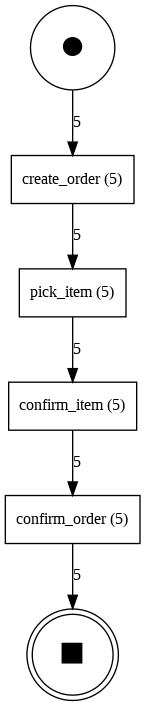

In [7]:
# flattening the log based on Item
log = pm4py.read_xes(os.getcwd()+'/'+os.path.basename(urlparse(url_running_example_flattened_Items).path))
dfg, sa, ea = pm4py.discover_directly_follows_graph(log)
pm4py.view_dfg(dfg, sa, ea)

## The divergence problem

Let's look at the manually flattened log we saw in Slide 7

parsing log, completed traces ::   0%|          | 0/3 [00:00<?, ?it/s]

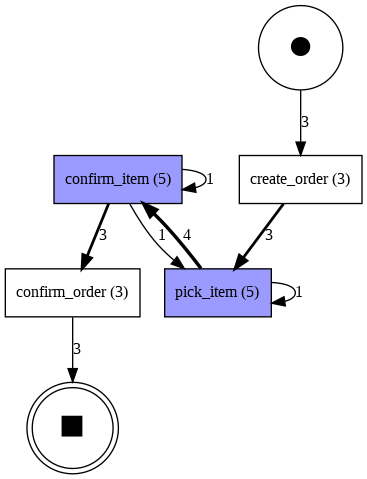

In [8]:
# flattening the log based on Order
log = pm4py.read_xes(os.getcwd()+'/'+os.path.basename(urlparse(url_running_example_flattened_Orders).path))
dfg, sa, ea = pm4py.discover_directly_follows_graph(log)
pm4py.view_dfg(dfg, sa, ea)

# Loading our running example in OCEL format

Let's open the OCEL file

In [9]:
ocel = pm4py.read_ocel(os.getcwd()+'/'+os.path.basename(urlparse(url_running_example).path))

In [10]:
# PM4Py enables importing OCELs
type(ocel)

pm4py.objects.ocel.obj.OCEL

In [11]:
ocel

Object-Centric Event Log (number of events: 16, number of objects: 8, number of activities: 4, number of object types: 2, events-objects relationships: 31)
Activities occurrences: {'pick_item': 5, 'confirm_item': 5, 'create_order': 3, 'confirm_order': 3}
Object types occurrences (number of objects): {'Item': 5, 'Order': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

In [12]:
pm4py.ocel_get_object_types(ocel)

['Order', 'Item']

## Discovering and Visualizing OC-DFG

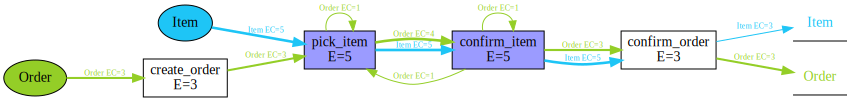

In [13]:
ocdfg = pm4py.discover_ocdfg(ocel)
ocdfg_visualization.apply(ocdfg)

## Converting OC-DFG to OC-Petri nets

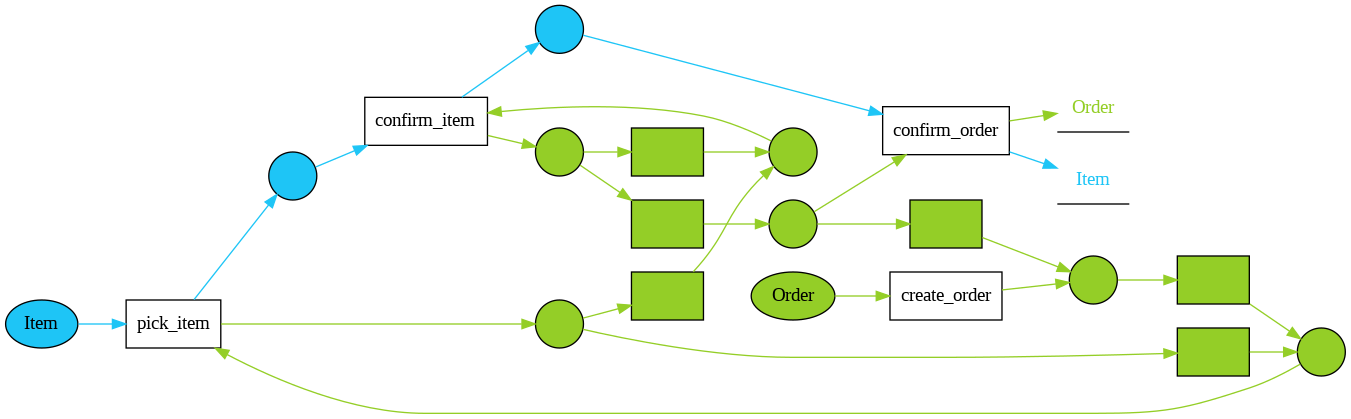

In [14]:
model = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(model, format="png")

# Looking into Object Type Clusttering through running example

In [15]:
ocel = pm4py.read_ocel(os.getcwd()+'/'+os.path.basename(urlparse(url_table1).path))

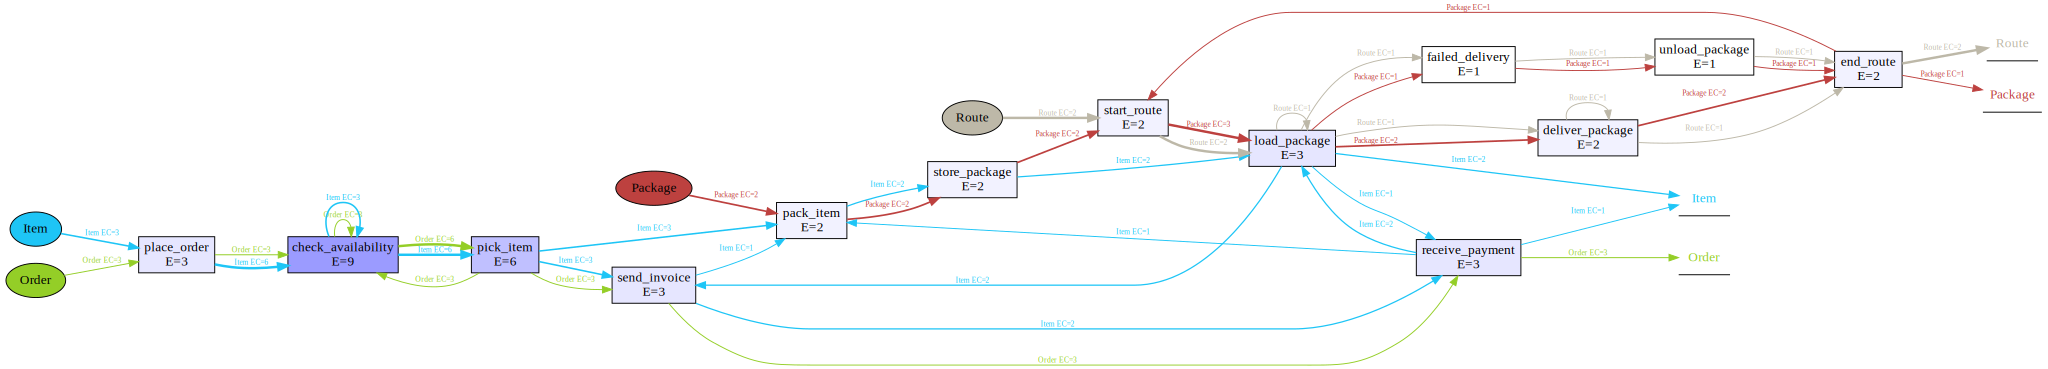

In [16]:
ocdfg = pm4py.discover_ocdfg(ocel)
ocdfg_visualization.apply(ocdfg)

## Executing the Cluster Tuning algorithm

This is a part of processmining library, using which we calculate markov ocdfg to discover sets of possible clusters by tuning the threshold parameter:



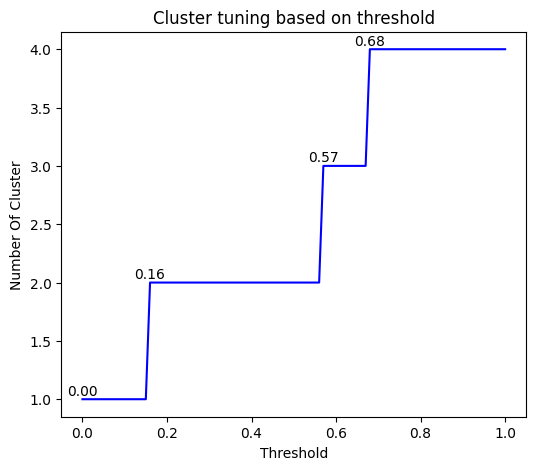

In [17]:
ocdfg_markov = ocdfgmrkv.discover_ocdfg_markov(ocdfg)
sim_matrix = ocdfgmrkv.discover_similarity_matrix(ocdfg_markov)
tunned_similarity_clusters = ocdfgmrkv.similarity_tuning(sim_matrix)
st = ocdfgmrkv.get_similarity_tuning_plot(tunned_similarity_clusters)

In tuning, we can have multiple sets of similar clusters for different thresholds. For example, The clusters for the threshold between 0 and 0.15 are the same. This is needed to visualize the start and end of the line. In order to calculate the unique number of clusters with unique members, we optimize it based on a threshold that has a minimum value. The result is shown below.

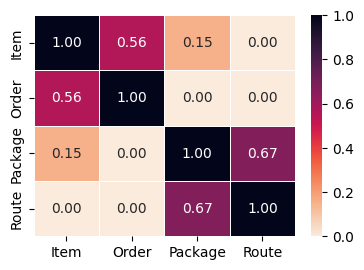

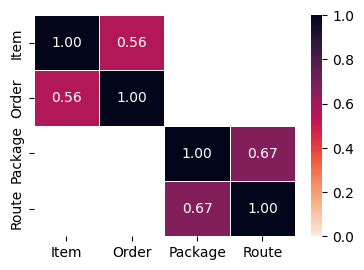

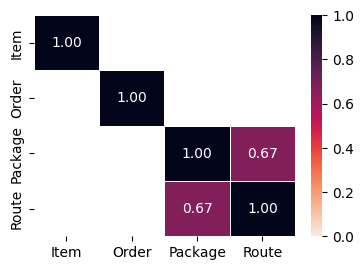

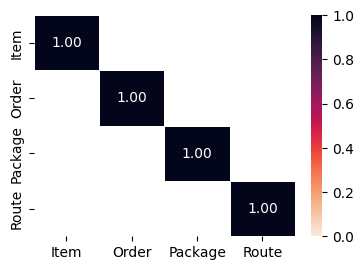

In [18]:
res = ocdfgmrkv.get_optimised_similarity_tuning(sim_matrix)
for thresh, v in res.items():
    test_matrix = ocdfgmrkv.filter_matrix(sim_matrix, thresh)
    s = ocdfgmrkv.get_similarity_plot(test_matrix, size=(4,3), annotation=True)

Let's see the result of cluster discovery when we set the threshold to 16 %:

In [19]:
clusters_dic = ocdfgmrkv.discover_clusters(sim_matrix, 0.16)
clusters_dic

{0: {'Package', 'Route'}, 1: {'Item', 'Order'}}

As can be seen, we have two clusteres. Lets visualize their ocdfg:

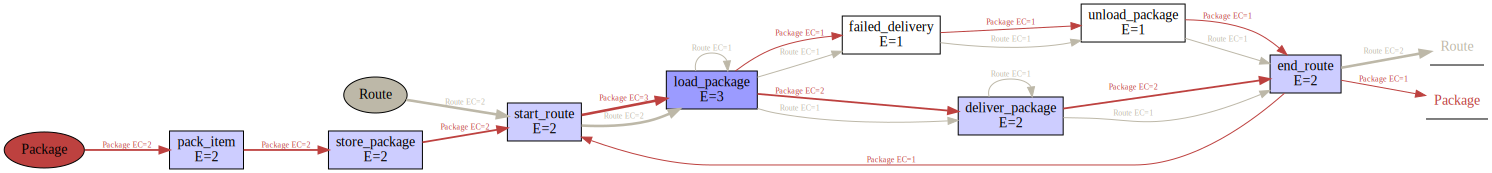

In [20]:
filtered_ocel = ocelhelper.filter_ocel(ocel, event_threshold=0, object_types={'Package', 'Route'})
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)

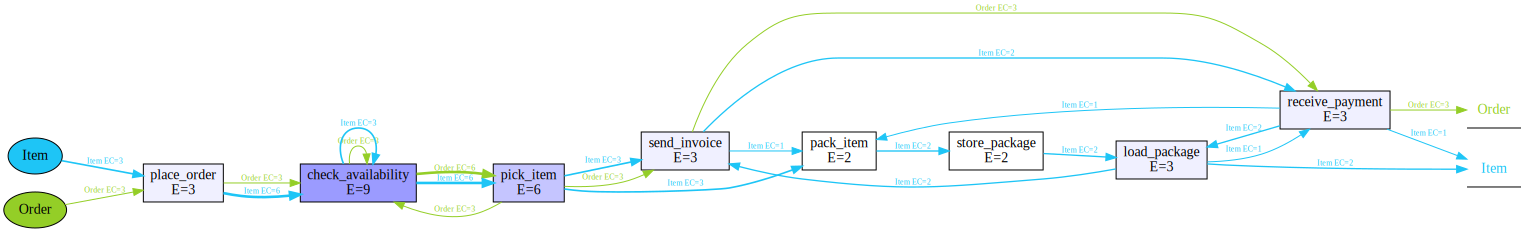

In [21]:
filtered_ocel = ocelhelper.filter_ocel(ocel, event_threshold=0, object_types={'Item', 'Order'})
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)

# Looking into Object Type Clusttering through p2p

In [22]:
ocel = pm4py.read_ocel(os.getcwd()+'/'+os.path.basename(urlparse(url_p2p.replace('.zip','')).path))

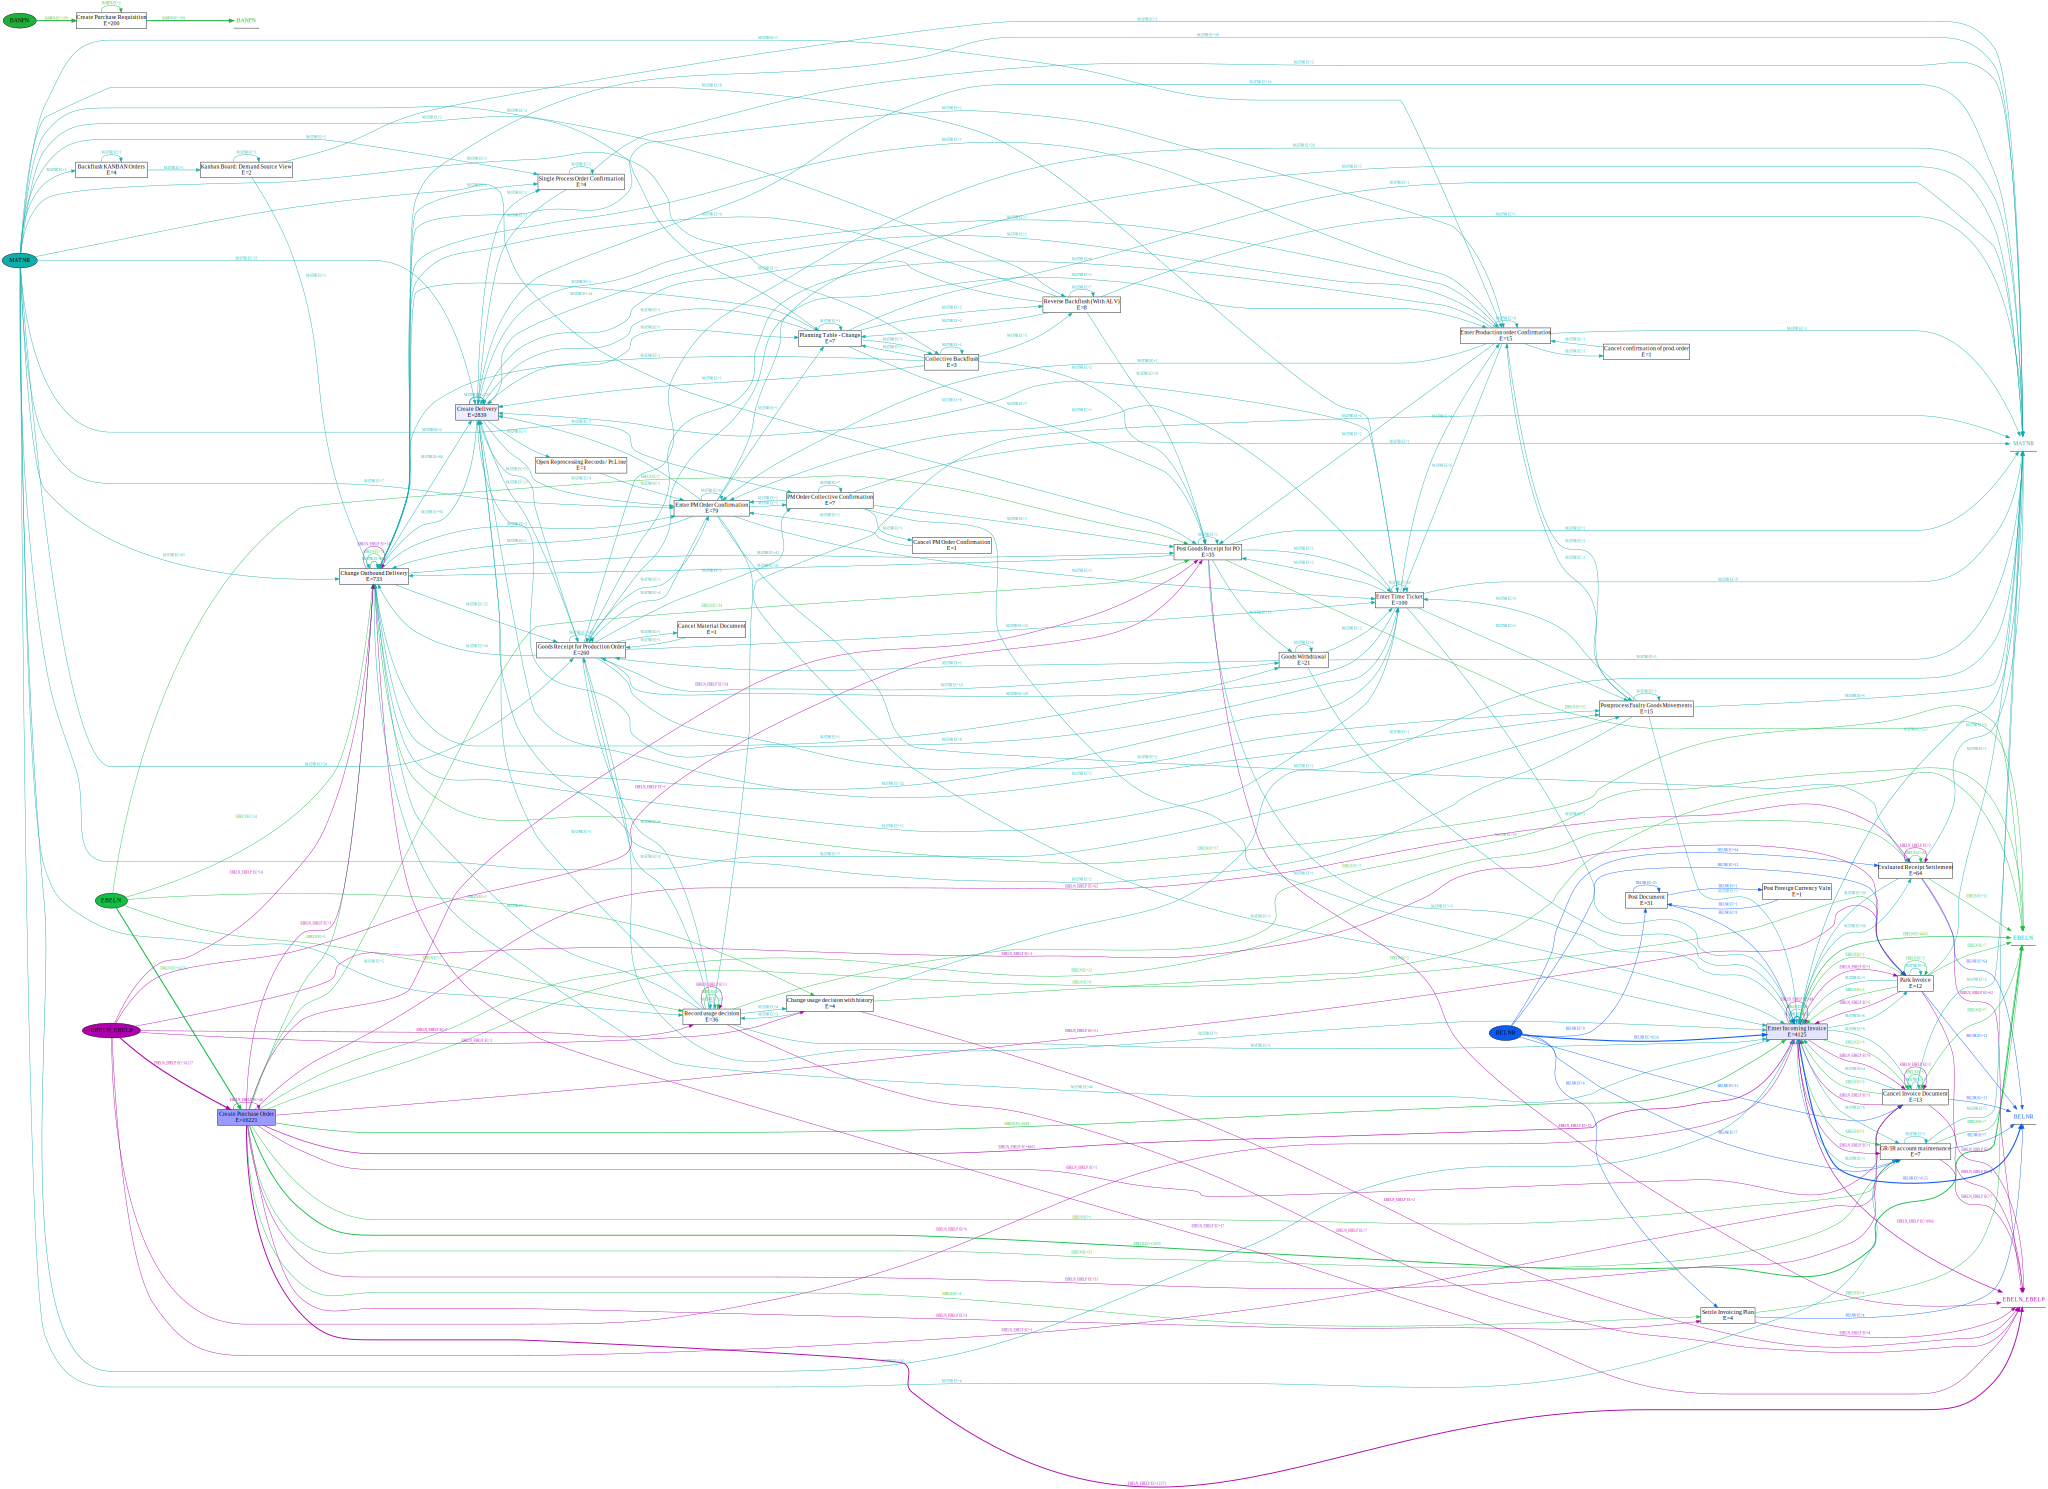

In [23]:
ocdfg = pm4py.discover_ocdfg(ocel)
ocdfg_visualization.apply(ocdfg)

Here, we calculate markov ocdfg, discover sets of possible clusters by tuning the threshold parameter:

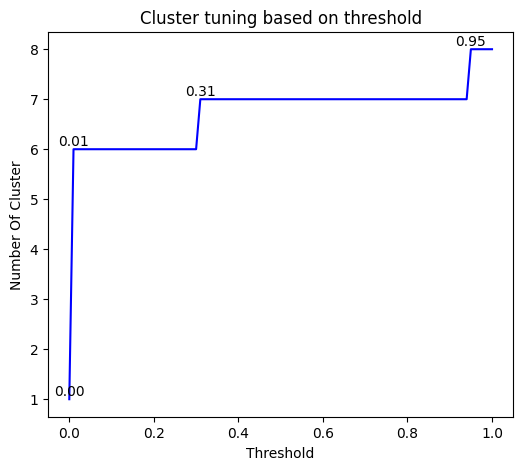

In [24]:
ocdfg_markov = ocdfgmrkv.discover_ocdfg_markov(ocdfg)
sim_matrix = ocdfgmrkv.discover_similarity_matrix(ocdfg_markov)
tunned_similarity_clusters = ocdfgmrkv.similarity_tuning(sim_matrix)
st = ocdfgmrkv.get_similarity_tuning_plot(tunned_similarity_clusters)

In tuning, we can have multiple sets of similar clusters for different thresholds. For example, The clusters for the threshold between 0.01 and 0.30 are the same. This is needed to visualize the start and end of the line. In order to calculate the unique number of clusters with unique members, we optimize it based on a threshold that has a minimum value. The result is shown below.

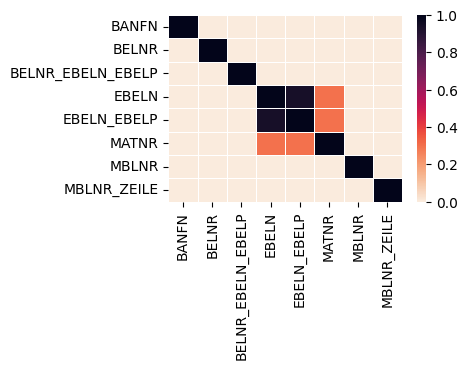

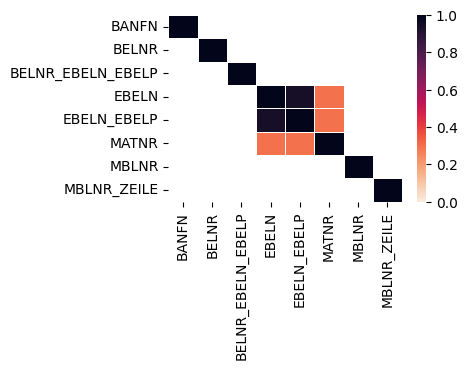

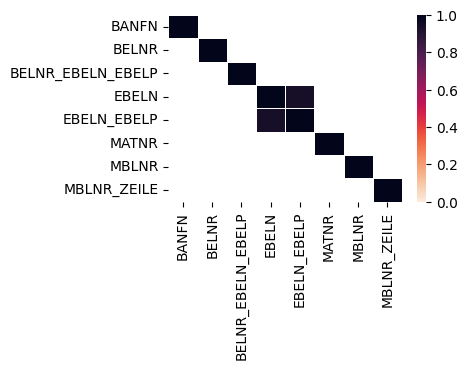

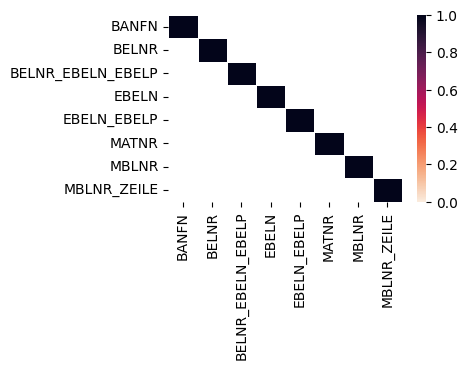

In [25]:
res = ocdfgmrkv.get_optimised_similarity_tuning(sim_matrix)
for thresh, v in res.items():
    test_matrix = ocdfgmrkv.filter_matrix(sim_matrix, thresh)
    s = ocdfgmrkv.get_similarity_plot(test_matrix, size=(5,4), annotation=False)

Let's see the result of cluster discovery when we set the threshold to 31 %:



In [26]:
clusters_dic = ocdfgmrkv.discover_clusters(sim_matrix, 0.31)
clusters_dic

{0: {'EBELN', 'EBELN_EBELP'},
 1: {'MBLNR_ZEILE'},
 2: {'MATNR'},
 3: {'BELNR'},
 4: {'BANFN'},
 5: {'BELNR_EBELN_EBELP'},
 6: {'MBLNR'}}

As can be seen, EBELN and EBELN_EBELP share similar behavioud in compare to rest of remaining clusters. Lets visualize their ocdfg:



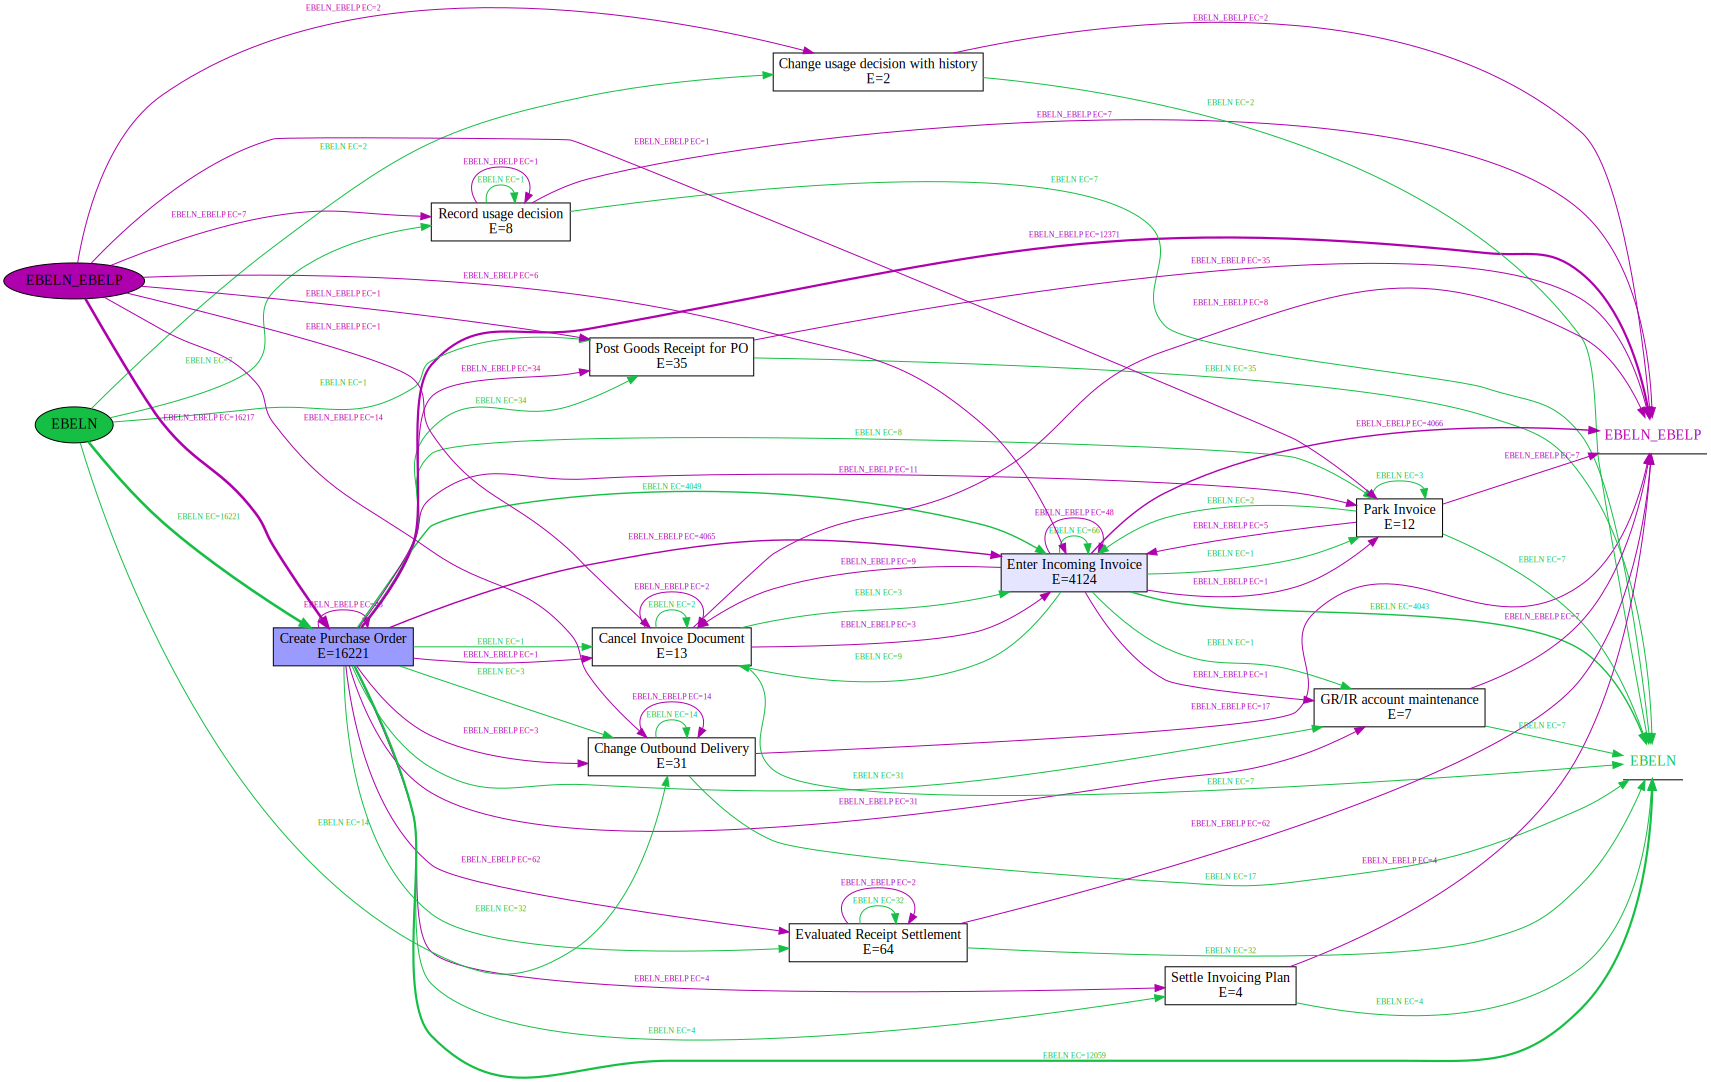

In [27]:
filtered_ocel = ocelhelper.filter_ocel(ocel, event_threshold=0, object_types={'EBELN', 'EBELN_EBELP'})
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)

If you are interested, I recommend looking into the full code [here](https://github.com/jalaliamin/ResearchCode/tree/dev/ot-clustering-markov-dfm-ocpm).

Also, you can read the paper [here](https://ieeexplore.ieee.org/document/9969591).